画像分類ならこれを改良すれば大体いい感じにできるらしい

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#CNNは2次元でいい 白黒なので1チャンネル
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


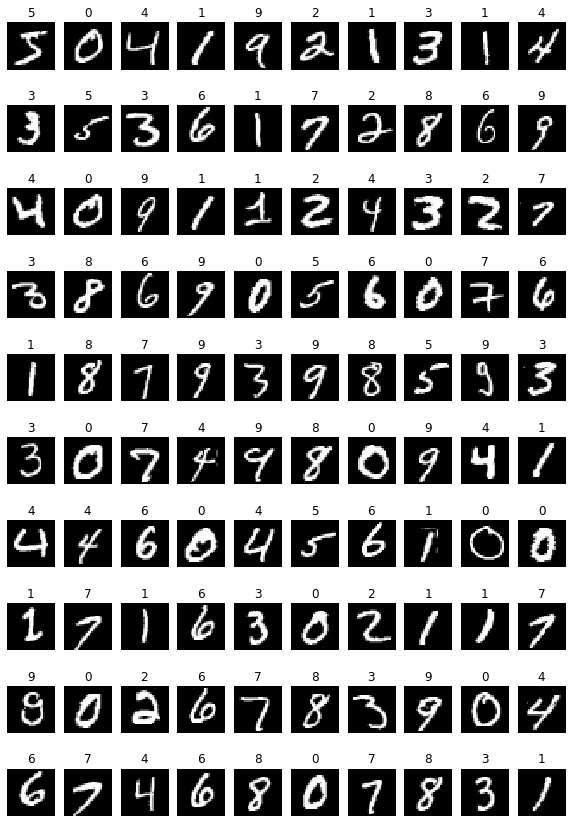

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,15))

for i in range(100):
    plt.subplot(10, 10, i + 1, xticks=[], yticks=[])
    plt.title(y_train[i].argmax())
    plt.axis('off')
    plt.imshow(x_train[i].reshape((28, 28)), cmap='gray')

In [0]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Activation #,Flatten
from keras.layers import GlobalAveragePooling2D

model = Sequential()
#CNNはDenseじゃなくConv 3*3のフィルタが20個
#VGG16が提案した指針に従い、フィルタ数はプーリングする度倍にする
model.add(Conv2D(20,(3,3),padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))#conv2Dのところにまとめて書いても良い
model.add(Conv2D(20,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(20,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(20,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(20,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Conv2D(40,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(40,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(40,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(40,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(40,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Conv2D(80,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(80,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(80,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(80,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(80,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 28, 28, 20)        200       
_________________________________________________________________
activation_104 (Activation)  (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 28, 28, 20)        3620      
_________________________________________________________________
activation_105 (Activation)  (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 28, 28, 20)        3620      
_________________________________________________________________
activation_106 (Activation)  (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 28, 28, 20)        3620      
__________

In [0]:

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.5606 - acc: 0.7994 - val_loss: 0.0720 - val_acc: 0.9772
Epoch 2/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0729 - acc: 0.9780 - val_loss: 0.0451 - val_acc: 0.9860
Epoch 3/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0520 - acc: 0.9842 - val_loss: 0.0412 - val_acc: 0.9863
Epoch 4/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0406 - acc: 0.9876 - val_loss: 0.0237 - val_acc: 0.9918
Epoch 5/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0343 - acc: 0.9892 - val_loss: 0.0241 - val_acc: 0.9918
Epoch 6/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0330 - acc: 0.9903 - val_loss: 0.0406 - val_acc: 0.9867
Epoch 7/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0284 - acc: 0.9910 - val_loss: 0.

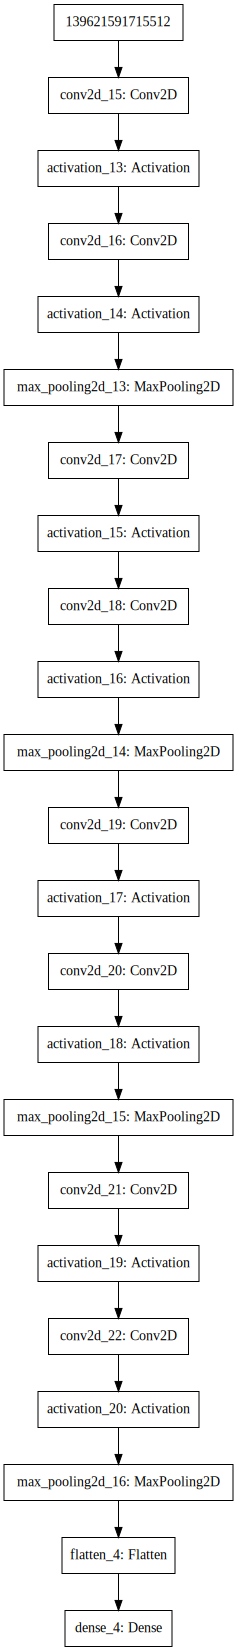

In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot

import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

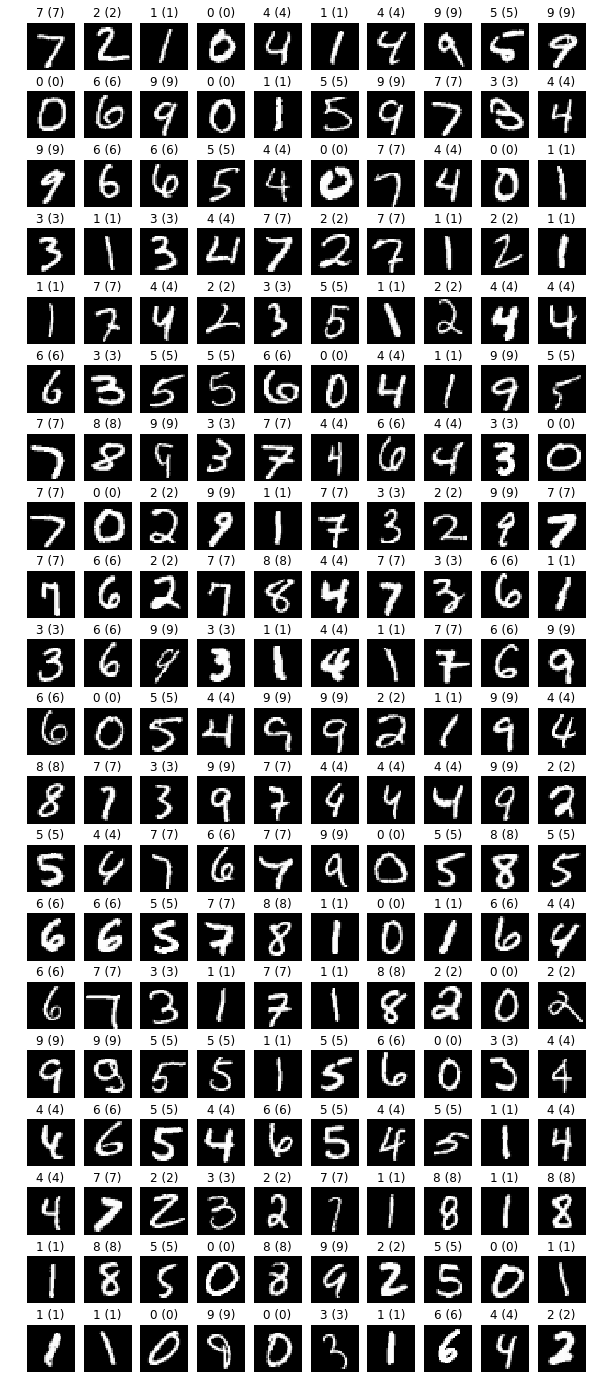

In [0]:
results = model.predict(x_test)

plt.figure(figsize=(10,25))

for i in range(200):
  label = results[i].argmax()
  gt_label = y_test[i].argmax()
  
  plt.subplot(20, 10, i+1)
  if label == gt_label:
    title_color = 'black'
  else:
    title_color = 'red'
  plt.title(str(label) + ' (' + str(gt_label) + ')', color=title_color)
  plt.axis('off')
  plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')

plt.show()